In [3]:
import numpy as np

N = 20000
t = np.linspace(0,80,N)
dt = t[1] - t[0]
N_state = 1
N_output = 1
N_input = 1

## System parameter
ep = 0.037
epsilon = 0.0001
beta = 42
x = np.zeros([N_state,1,N])
x[0,0,0] = 1. 
r = np.zeros([N_output,1,N])
u = np.zeros([N_input,1,N])

## Controller parameter
q = 5
p = 3
A = 0.9
kd = 0.04
kp = 2.
ki = -0.4
alpha = 0.9
m1 = 10
m2 = 0.1
b = 10
l = 0.0025
delta = 0.01

u_eq = np.zeros([N_input,1,N])
u_S = np.zeros([N_input,1,N])
s = np.zeros([N_input,1,N])
e = np.zeros([N_input,1,N])
int_e = np.zeros([N_input,1,N])
dif_e = np.zeros([N_input,1,N])

for i in range(N-1):
    # System
    r[0,0,i] = np.sin(t[i])
    xdot = beta*u[0,0,i] - ep*np.absolute(x[0,0,i])*x[0,0,i]
    x[0,0,i+1] = x[0,0,i] + dt*xdot
    
    ## Controller
    
    e[0,0,i] = r[0,0,i] - x[0,0,i]
    print(e[0,0,i])
    if i>0:
        int_e[0,0,i] = int_e[0,0,i-1] + dt*(np.sign(e[0,0,i])*np.power(np.absolute(e[0,0,i]),q/p))
        dif_e[0,0,i] = e[0,0,i] - e[0,0,i-1]
    
    ## Eq 12
    sdot = -b*s[0,0,i] + kp*e[0,0,i] + ki*int_e[0,0,i] + kd*dif_e[0,0,i]
    s[0,0,i+1] = s[0,0,i] + dt*sdot
    
    ## Eq 35
    u_eqdot = ((kd*beta)**(-1))*(b*sdot - kp*(- ep*np.absolute(x[0,0,i])*x[0,0,i]+beta*u_eq[0,0,i]-np.cos(t[i]))-ki*(np.sign(e[0,0,i])*np.power(np.absolute(e[0,0,i]),q/p))-kd*(-ep*(x[0,0,i])**2/np.absolute(x[0,0,i]+epsilon)-ep*np.absolute(x[0,0,i])+np.sin(t[i])))
    u_eq[0,0,i+1] = u_eq[0,0,i] + dt*u_eqdot

    ## Eq 36
    u_Sdot = -((kd*beta)**(-1))*(kp*beta*u_S[0,0,i]+m1*np.absolute(sdot)*np.sign(sdot)+m2*(np.absolute(sdot)**alpha)*np.sign(sdot)+delta*np.sign(sdot))
    u_S[0,0,i+1] = u_S[0,0,i] + dt*u_Sdot
    
    ## Eq 34
    udot = u_eqdot + u_Sdot   
    u[0,0,i+1] = u[0,0,i] + dt*udot
    #u[0,0,i] = u_eq[0,0,i] + u_S[0,0,i]
    
    ## Eq 33
    xdot = beta*u[0,0,i] - ep*np.absolute(x[0,0,i])*x[0,0,i]
    x[0,0,i+1] = x[0,0,i] + dt*xdot
    

-1.0
-0.9958518032578878
-0.9924532158626672
-0.9896521654241365
-0.9873270048157352
-0.9853804363518726
-0.9837346542257739
-0.982327455308144
-0.981109125318425
-0.9800399458303113
-0.9790881983659958
-0.9782285664930739
-0.9774408565850304
-0.976708973718883
-0.9760201018454103
-0.97536404750603
-0.9747327144885022
-0.9741196833137664
-0.973519874650794
-0.9729292799235105
-0.9723447457103724
-0.9717638012086102
-0.9711845201740437
-0.9706054104598801
-0.9700253256490063
-0.9694433943720528
-0.9688589637824067
-0.9682715543630277
-0.9676808238033053
-0.9670865381352443
-0.9664885486793899
-0.96588677364002
-0.9652811834206002
-0.9646717889158125
-0.9640586321848268
-0.9634417790292673
-0.9628213130944081
-0.9621973311882646
-0.961569939574192
-0.9609392510413881
-0.9603053825967596
-0.9596684536528785
-0.9590285846117814
-0.9583858957644089
-0.9577405064415133
-0.9570925343647078
-0.9564420951566033
-0.9557893019772059
-0.9551342652603291
-0.9544770925290471
-0.9538178882734254
-0.9

-0.5514474099092027
-0.5511204467744379
-0.5507937034306282
-0.5504671797050887
-0.550140875427781
-0.5498147904312994
-0.5494889245508617
-0.5491632776242982
-0.5488378494920402
-0.5485126399971091
-0.5481876489851047
-0.5478628763041956
-0.5475383218051053
-0.5472139853411021
-0.5468898667679878
-0.5465659659440855
-0.5462422827302281
-0.5459188169897462
-0.5455955685884579
-0.5452725373946543
-0.5449497232790893
-0.5446271261149669
-0.5443047457779292
-0.543982582146044
-0.5436606350997938
-0.5433389045220614
-0.5430173902981184
-0.5426960923156132
-0.5423750104645579
-0.5420541446373159
-0.5417334947285888
-0.5414130606354045
-0.5410928422571034
-0.5407728394953262
-0.5404530522540003
-0.5401334804393279
-0.5398141239597714
-0.5394949827260411
-0.5391760566510834
-0.5388573456500644
-0.5385388496403593
-0.5382205685415374
-0.53790250227535
-0.5375846507657157
-0.5372670139387073
-0.5369495917225398
-0.5366323840475535
-0.5363153908462036
-0.5359986120530444
-0.5356820476047175
-0.5

-0.34560947798280406
-0.34545541959555837
-0.34530151005262755
-0.34514774927697933
-0.34499413719113703
-0.34484067371716587
-0.34468735877666834
-0.3445341922907694
-0.34438117418011216
-0.344228304364843
-0.3440755827646049
-0.3439230092985289
-0.3437705838852204
-0.3436183064427547
-0.3434661768886619
-0.343314195139923
-0.3431623611129554
-0.34301067472360536
-0.34285913588714045
-0.34270774451823593
-0.3425565005309693
-0.34240540383880735
-0.34225445435459834
-0.34210365199056436
-0.34195299665828727
-0.34180248826870474
-0.34165212673209555
-0.3415019119580752
-0.3413518438555825
-0.34120192233287183
-0.34105214729750555
-0.34090251865634125
-0.34075303631552634
-0.34060370018048447
-0.340454510155911
-0.34030546614575985
-0.340156568053236
-0.34000781578078865
-0.3398592092300966
-0.3397107483020656
-0.33956243289681354
-0.3394142629136665
-0.3392662382511459
-0.33911835880696073
-0.33897062447800097
-0.33882303516032475
-0.3386755907491532
-0.3385282911388583
-0.3383811362229

-0.23071398351976546
-0.23061835603511627
-0.23052276139823247
-0.2304271995984295
-0.23033167062647486
-0.23023617447458766
-0.23014071113643675
-0.2300452806071409
-0.22994988288326712
-0.22985451796282963
-0.22975918584528854
-0.22966388653154857
-0.22956862002395773
-0.22947338632630576
-0.22937818544382216
-0.22928301738317503
-0.22918788215246866
-0.22909277976124232
-0.22899771022046722
-0.22890267354254568
-0.22880766974130817
-0.22871269883201095
-0.22861776083133412
-0.22852285575737863
-0.22842798362966465
-0.22833314446912745
-0.22823833829811613
-0.2281435651403897
-0.22804882502111523
-0.22795411796686316
-0.22785944400560587
-0.22776480316671388
-0.2276701954809517
-0.2275756209804759
-0.2274810796988307
-0.22738657167094445
-0.2272920969331259
-0.22719765552306104
-0.2271032474798088
-0.22700887284379667
-0.2269145316568174
-0.22682022396202461
-0.22672594980392913
-0.2266317092283926
-0.22653750228262626
-0.22644332901518405
-0.2263491894759585
-0.22625508371617686
-0.

-0.16120195075440924
-0.1611549816210167
-0.16110798096084922
-0.16106094845030294
-0.16101388376702852
-0.16096678658994168
-0.16091965659924234
-0.16087249347641974
-0.16082529690426994
-0.16077806656691407
-0.16073080214980218
-0.1606835033397329
-0.16063616982486373
-0.16058880129473008
-0.16054139744024964
-0.16049395795373977
-0.160446482528935
-0.16039897086099164
-0.1603514226465057
-0.16030383758352384
-0.16025621537156154
-0.16020855571160697
-0.1601608583061387
-0.16011312285914236
-0.16006534907611447
-0.16001753666408092
-0.1599696853316065
-0.1599217947888134
-0.1598738647473848
-0.1598258949205812
-0.15977788502325763
-0.15972983477186664
-0.15968174388447642
-0.15963361208078003
-0.15958543908211337
-0.15953722461145786
-0.1594889683934574
-0.15944067015443408
-0.1593923296223912
-0.1593439465270311
-0.15929552059976332
-0.15924705157372293
-0.15919853918377208
-0.15914998316651635
-0.15910138326032086
-0.1590527392053121
-0.15900405074339508
-0.15895531761826187
-0.158

-0.10877891186272137
-0.10874174482926241
-0.10870462580544937
-0.10866755482785462
-0.10863053193323396
-0.10859355715851854
-0.10855663054081072
-0.10851975211736298
-0.10848292192558961
-0.10844614000304575
-0.1084094063874228
-0.10837272111654
-0.10833608422833696
-0.10829949576086834
-0.10826295575228295
-0.10822646424083476
-0.10819002126486194
-0.10815362686278163
-0.10811728107308172
-0.10808098393431237
-0.10804473548508065
-0.10800853576403008
-0.10797238480985
-0.10793628266125538
-0.10790022935698096
-0.10786422493577252
-0.10782826943637858
-0.10779236289754446
-0.10775650535799153
-0.1077206968564266
-0.10768493743152097
-0.10764922712190483
-0.10761356596615834
-0.10757795400280223
-0.10754239127029264
-0.10750687780699952
-0.10747141365121626
-0.10743599884113797
-0.10740063341485617
-0.10736531741034883
-0.10733005086547209
-0.10729483381795368
-0.10725966630537198
-0.10722454836516448
-0.10718948003460682
-0.10715446135080686
-0.10711949235069473
-0.10708457307101404


-0.08355970608959029
-0.08352648917093808
-0.08349327873870316
-0.08346007462791782
-0.08342687667365734
-0.08339368471104913
-0.0833604985752946
-0.08332731810166638
-0.08329414312552996
-0.08326097348235284
-0.08322780900771709
-0.08319464953733013
-0.08316149490703528
-0.08312834495283228
-0.08309519951087518
-0.08306205841749381
-0.0830289215092026
-0.08299578862271328
-0.08296265959494564
-0.08292953426303751
-0.08289641246436563
-0.08286329403654369
-0.0828301788174427
-0.08279706664520092
-0.08276395735823538
-0.08273085079525322
-0.08269774679526132
-0.0826646451975872
-0.08263154584187604
-0.08259844856811249
-0.08256535321662928
-0.08253225962811872
-0.08249916764364451
-0.08246607710465037
-0.08243298785298114
-0.08239989973088035
-0.08236681258101053
-0.08233372624646262
-0.08230064057076691
-0.08226755539790442
-0.08223447057231659
-0.08220138593892423
-0.08216830134312625
-0.08213521663081969
-0.0821021316484083
-0.08206904624281397
-0.08203596026148763
-0.082002873552418

-0.05602598856681573
-0.05601239164476057
-0.05599882806329437
-0.055985297637850984
-0.05597180018230019
-0.05595833550894813
-0.05594490342853886
-0.05593150375025435
-0.055918136281716935
-0.055904800828989965
-0.05589149719657871
-0.055878225187432906
-0.05586498460294709
-0.05585177524296314
-0.0558385969057712
-0.055825449388112514
-0.05581233248518047
-0.055799245990623025
-0.05578618969654492
-0.055773163393509684
-0.05576016687054208
-0.05574719991513011
-0.05573426231322831
-0.055721353849260025
-0.055708474306119804
-0.055695623465176425
-0.05568280110627599
-0.05567000700774449
-0.05565724094639146
-0.055644502697512865
-0.05563179203489421
-0.05561910873081466
-0.055606452556049346
-0.055593823279874166
-0.055581220670068765
-0.05556864449292043
-0.055556094513228294
-0.055543570494306915
-0.05553107219799036
-0.05551859938463655
-0.0555061518131319
-0.05549372924089446
-0.05548133142388034
-0.055468958116586364
-0.05545660907205563
-0.055444284041882064
-0.055431982776215

-0.03674484845659165
-0.03671688627945535
-0.036688918443619545
-0.03666094512030427
-0.03663296648159897
-0.03660498270045465
-0.036576993950673486
-0.0365490004068989
-0.03652100224460708
-0.03649299964009056
-0.03646499277045756
-0.03643698181361488
-0.036408966948260124
-0.03638094835387051
-0.03635292621069264
-0.03632490069973404
-0.03629687200274545
-0.03626884030222055
-0.03624080578137867
-0.03621276862415557
-0.036184729015192874
-0.03615668713982745
-0.03612864318408193
-0.03610059733464688
-0.03607254977888086
-0.036044500704791815
-0.0360164503010284
-0.03598839875686821
-0.03596034626220734
-0.03593229300755085
-0.03590423918399399
-0.035876184983222315
-0.03584813059749259
-0.03582007621962391
-0.03579202204298604
-0.035763968261487866
-0.0357359150695683
-0.03570786266217629
-0.03567981123477171
-0.0356517609833058
-0.03562371210421156
-0.03559566479439169
-0.03556761925120755
-0.03553957567246935
-0.03551153425641551
-0.035483495201714454
-0.03545545870744371
-0.035427

-0.02195865189943813
-0.021949684785162016
-0.021940676214325494
-0.021931625842520508
-0.021922533326084404
-0.021913398322157107
-0.02190422048865326
-0.02189499948431406
-0.02188573496870594
-0.021876426602219445
-0.02186707404612087
-0.02185767696252383
-0.021848235014447437
-0.021838747865786767
-0.021829215181366157
-0.021819636626936645
-0.02181001186917464
-0.02180034057573399
-0.02179062241521701
-0.02178085705723265
-0.021771044172366638
-0.021761183432234543
-0.021751274509479335
-0.02174131707776894
-0.021731310811849758
-0.02172125538751546
-0.02171115048166672
-0.021700995772279685
-0.021690790938459936
-0.02168053566043948
-0.02167022961957321
-0.021659872498393518
-0.021649463980577766
-0.02163900375100858
-0.021628491495741198
-0.021617926902057882
-0.021607309658464247
-0.021596639454685596
-0.021585915981721215
-0.0215751389318114
-0.021564307998497845
-0.02155342287658979
-0.021542483262219414
-0.021531488852837066
-0.02152043934720682
-0.02150933444546177
-0.021498

-0.0007433141177757008
-0.0007247065692311261
-0.000706132386470798
-0.000687591588877573
-0.0006690841963694627
-0.0006506102293475091
-0.0006321697087477707
-0.0006137626559819254
-0.0005953890929887851
-0.0005770490421815877
-0.0005587425264643453
-0.0005404695692481087
-0.0005222301943978713
-0.0005040244262827231
-0.00048585228971598227
-0.00046771381000448864
-0.0004496090128956465
-0.0004315379245918849
-0.00041350057176581245
-0.00039549698150587176
-0.0003775271813650227
-0.0003595911992995693
-0.000341689063716899
-0.00032382080342086006
-0.0003059864476245844
-0.0002881860259635327
-0.0002704195684394839
-0.00025268710546672013
-0.0002349886678083557
-0.00021732428662102343
-0.00019969399339742067
-0.00018209781997519103
-0.00016453579854536216
-0.0001470079615914499
-0.00012951434192887135
-0.00011205497263400144
-9.462988707875652e-05
-7.723911886059476e-05
-5.9882701794466975e-05
-4.256066989760665e-05
-2.5273057295382984e-05
-8.019898205979814e-06
9.198773224639023e-06
2

0.012708162728564565
0.012727654593272075
0.012747163151302532
0.01276668851316709
0.012786230788316422
0.012805790085112734
0.012825366510843317
0.012844960171689901
0.012864571172742312
0.01288419961797116
0.012903845610227505
0.012923509251242637
0.012943190641601543
0.012962889880755668
0.01298260706699439
0.013002342297457337
0.013022095668108968
0.01304186727373835
0.013061657207958821
0.013081465563183126
0.013101292430635514
0.013121137900324875
0.013141002061056173
0.013160885000406908
0.01318078680472734
0.013200707559138825
0.013220647347512493
0.013240606252478804
0.013260584355404004
0.013280581736399677
0.01330059847430165
0.01332063464666966
0.013340690329786686
0.013360765598638302
0.013380860526921778
0.013400975187024766
0.013421109650033958
0.013441263985715657
0.013461438262515446
0.01348163254755741
0.013501846906625703
0.013522081404172992
0.013542336103300356
0.013562611065765728
0.013582906351966129
0.013603222020937333
0.01362355813035332
0.01364391473650961
0.

0.028393024998605076
0.028396316607507743
0.028399612725907186
0.028402913694883014
0.028406219856233705
0.028409531552486045
0.028412849126860817
0.028416172923282468
0.028419503286347125
0.02842284056131783
0.028426185094121315
0.028429537231313917
0.02843289732009302
0.028436265708259634
0.028439642744230054
0.028443028777001
0.028446424156145955
0.02844982923181094
0.028453244354679885
0.02845666987598583
0.02846010614747252
0.028463553521406504
0.028467012350540832
0.02847048298811139
0.0284739657878329
0.0284774611038624
0.028480969290811897
0.028484490703707732
0.028488025698003683
0.02849157462954377
0.028495137854557817
0.028498715729658564
0.028502308611802474
0.028505916858304503
0.028509540826795465
0.028513180875236133
0.028516837361878267
0.028520510645260955
0.02852420108420739
0.028527909037785126
0.028531634865321065
0.02853537892635749
0.028539141580667837
0.028542923188215275
0.0285467241091506
0.028550544703808134
0.028554385332665744
0.02855824635635995
0.028562128

0.04309160028593395
0.04311073350134337
0.043129841961639215
0.04314892549908278
0.04316798394695415
0.04318701713960704
0.043206024912459784
0.043225007101985735
0.043243963545768316
0.04326289408245909
0.043281798551839445
0.04330067679477834
0.043319528653287254
0.043338353970510335
0.04335715259071443
0.04337592435934412
0.043394669122978624
0.043413386729393544
0.04343207702751789
0.04345073986748871
0.043469375100640806
0.043487982579495876
0.04350656215781756
0.04352511369056761
0.04354363703396735
0.043562132045453617
0.043580598583733865
0.04359903650877445
0.043617445681789824
0.043635825965296915
0.04365417722307047
0.04367249932020473
0.04369079212306809
0.04370905549935811
0.043727289318089224
0.04374549344958101
0.043763667765512826
0.04378181213887772
0.04379992644404429
0.04381801055671014
0.04383606435395693
0.04385408771423749
0.0438720805173628
0.04389004264455698
0.04390797397841001
0.043925874402939546
0.04394374380354321
0.04396158206705347
0.04397938908172416
0.0

0.028504559219127146
0.028480455239000668
0.02845634770410127
0.028432236749295348
0.02840812251021496
0.02838400512326683
0.02835988472563966
0.028335761455250297
0.02831163545078247
0.028287506851626676
0.028263375797919155
0.028239242430487255
0.028215106890857822
0.028190969321264636
0.028166829864594622
0.028142688664425597
0.028118545864967315
0.028094401611098885
0.028070256048315034
0.02804610932273388
0.028021961581104038
0.027997812970751212
0.027973663639615287
0.027949513736191367
0.02792536340956686
0.02790121280936808
0.027877062085767568
0.02785291138949042
0.02782876087176156
0.02780461068434259
0.027780460979472177
0.02775631190990302
0.027732163628848783
0.02770801628999109
0.027683870047485182
0.027659725055907858
0.02763558147029277
0.027611439446073027
0.027587299139115173
0.027563160705668333
0.02753902430236954
0.027514890086249855
0.027490758214682276
0.027466628845416508
0.027442502136521663
0.027418378246420017
0.02739425733383616
0.02737013955780221
0.0273460

0.007727863076301467
0.007696834639532635
0.007665769483250595
0.007634667656684968
0.007603529210341242
0.007572354196028197
0.007541142666854572
0.007509894677227291
0.00747861028287744
0.007447289540843061
0.007415932509498013
0.007384539248535771
0.0073531098189939526
0.0073216442832523265
0.007290142705030145
0.0072586051494104575
0.0072270316828245695
0.007195422373078353
0.007163777289336815
0.0071320965021477445
0.007100380083438718
0.007068628106515096
0.007036840646082343
0.0070050177782315926
0.006973159580463628
0.006941266131674895
0.006909337512178926
0.006877373803703457
0.006845375089388428
0.006813341453806743
0.006781272982950393
0.0067491697642527715
0.006717031886575242
0.006684859440226787
0.006652652516961566
0.006620411209976473
0.006588135613930013
0.006555825824929862
0.0065234819405523
0.006491104059830666
0.006458692283272116
0.006426246712855965
0.006393767452031018
0.006361254605732336
0.006328708280369688
0.006296128583845539
0.006263515625543392
0.0062308

-0.01899652357757331
-0.019011406064923575
-0.019026291113166116
-0.01904117893399382
-0.019056069739162185
-0.019070963740442926
-0.019085861149626404
-0.019100762178522857
-0.019115667038915873
-0.019130575942589045
-0.019145489101273783
-0.019160406726676404
-0.01917532903043051
-0.01919025622409909
-0.019205188519177296
-0.019220126127044268
-0.0192350692589911
-0.019250018126167445
-0.01926497293960938
-0.01927993391019145
-0.01929490124862876
-0.01930987516548055
-0.019324855871100444
-0.019339843575666094
-0.019354838489124226
-0.01936984082122062
-0.019384850781449914
-0.019399868579059065
-0.019414894423050888
-0.019429928522133877
-0.019444971084752516
-0.019460022319031878
-0.019475082432807822
-0.019490151633577146
-0.019505230128500473
-0.01952031812440702
-0.019535415827742986
-0.019550523444603507
-0.019565641180676052
-0.019580769241271834
-0.019595907831275183
-0.019611057155146883
-0.019626217416929492
-0.01964138882019495
-0.019656571568077874
-0.019671765863217727
-

-0.04058515455553391
-0.040611812440903394
-0.040638406648752956
-0.04066493690050743
-0.04069140291916756
-0.040717804429273086
-0.04074414115692748
-0.04077041282982308
-0.040796619177202675
-0.040822759929947716
-0.040848834820539914
-0.04087484358308596
-0.0409007859533424
-0.04092666166867692
-0.040952470468156144
-0.040978212092506794
-0.04100388628415319
-0.041029492787177935
-0.041055031347409676
-0.04108050171238409
-0.041105903631368124
-0.04113123685538411
-0.04115650113716979
-0.04118169623126677
-0.041206821893980394
-0.04123187788340371
-0.04125686395944139
-0.041281779883769076
-0.04130662541992197
-0.041331400333253776
-0.04135610439096071
-0.04138073736210501
-0.04140529901757328
-0.041429789130165595
-0.041454207474553584
-0.04147855382731713
-0.041502827966901856
-0.041527029673708526
-0.04155115873005044
-0.041575214920176684
-0.04159919803029516
-0.04162310784852974
-0.041646944165009525
-0.04167070677182544
-0.04169439546305315
-0.0417180100347761
-0.0417415502850

-0.0550970054020915
-0.055113497543131384
-0.05513002056108596
-0.055146574490434086
-0.05516315936610272
-0.05517977522337986
-0.05519642209796283
-0.05521310002593893
-0.05522980904376573
-0.055246549188319005
-0.05526332049680571
-0.05528012300681168
-0.055296956756268556
-0.055313821783500694
-0.055330718127138745
-0.05534764582616647
-0.055364604919901084
-0.05538159544797305
-0.055398617450372556
-0.05541567096736327
-0.05543275603952863
-0.055449872707751424
-0.05546702101319412
-0.05548420099734391
-0.05550141270192743
-0.05551865616895563
-0.055535931440690856
-0.05555323855969141
-0.05557057756872641
-0.05558794851082022
-0.055605351429232175
-0.055622786367436394
-0.055640253369165504
-0.055657752478325884
-0.05567528373904174
-0.055692847195634165
-0.05571044289260102
-0.055728070874660085
-0.05574573118666443
-0.05576342387364591
-0.05578114898078168
-0.05579890655343667
-0.05581669663707983
-0.05583451927732669
-0.05585237451991831
-0.055870262410700644
-0.055888182995666

-0.0725134331006424
-0.07248278605335123
-0.07245211749303004
-0.07242142854478828
-0.07239072015632819
-0.07235999313059671
-0.07232924815203368
-0.07229848580766163
-0.07226770660413517
-0.07223691098143936
-0.07220609932398969
-0.07217527196958462
-0.07214442921672515
-0.07211357133051322
-0.07208269854749039
-0.07205181107959746
-0.07202090911739989
-0.07198999283280416
-0.07195906238125638
-0.07192811790360043
-0.0718971595276372
-0.0718661873694123
-0.07183520153436429
-0.07180420211825478
-0.07177318920800213
-0.071742162882374
-0.07171112321264705
-0.07168007026313838
-0.07164900409170305
-0.07161792475018192
-0.07158683228477991
-0.07155572673646071
-0.07152460814125905
-0.0714934765305919
-0.07146233193154772
-0.07143117436713042
-0.07140000385653622
-0.0713688204153653
-0.07133762405584876
-0.07130641478703581
-0.07127519261501669
-0.07124395754308788
-0.07121270957193226
-0.07118144869979026
-0.07115017492260078
-0.07111888823418011
-0.07108758862634834
-0.07105627608907261

-0.04752230707736982
-0.04751221929257443
-0.047502127449681186
-0.04749203120033918
-0.04748193019556257
-0.04747182408574924
-0.047461712520668886
-0.04745159514951203
-0.04744147162087842
-0.04743134158280171
-0.04742120468273725
-0.04741106056761235
-0.0474009088838141
-0.04739074927720843
-0.047380581393159815
-0.04737040487651756
-0.047360219371668455
-0.04735002452252357
-0.04733981997253811
-0.04732960536473074
-0.04731938034167049
-0.047309144545530146
-0.04729889761807271
-0.04728863920067827
-0.04727836893433002
-0.047268086459668957
-0.04725779141697972
-0.047247483446211436
-0.047237162186997805
-0.04722682727864291
-0.04721647836017706
-0.04720611507034245
-0.04719573704761382
-0.04718534393021989
-0.04717493535612727
-0.047164510963098705
-0.04715407038867803
-0.04714361327021843
-0.047133139244866396
-0.04712264794962129
-0.047112139021318944
-0.04710161209665342
-0.04709106681219932
-0.047080502804393576
-0.04706991970959795
-0.04705931716408118
-0.04704869480404106
-0

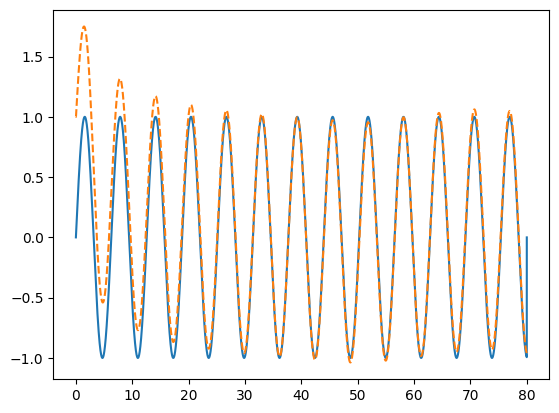

In [4]:
import matplotlib.pyplot as plt
plt.plot(t,r[0,0,:])
plt.plot(t,x[0,0,:],'--')

plt.show()

In [5]:
np.power((np.power(-12,q)),(1/p))

<ipython-input-5-9194e7b2b855>:1: RuntimeWarning: invalid value encountered in power
  np.power((np.power(-12,q)),(1/p))


nan

In [6]:
np.power(-10.2,1/3)

<ipython-input-6-3ee327ff94d3>:1: RuntimeWarning: invalid value encountered in power
  np.power(-10.2,1/3)


nan

In [7]:
np.float_power(-5, 1/3)

<ipython-input-7-2ce011ccb4ce>:1: RuntimeWarning: invalid value encountered in float_power
  np.float_power(-5, 1/3)


nan

In [1]:
import numpy as np

N = 20000
t = np.linspace(0,10,N)
dt = t[1] - t[0]
N_state = 5
N_output = 1
N_input = 1

## System parameter
ep = 0.037
epsilon = 0.0001
beta = 42
J_O2 = 6e-3
phi_in_O2 = 0.21
phi_in_H2 = 0.99
E0_cell = 1.2271
B_conc = 0.05
T_fc = 320 
A_fc = 0.1
rho0 = 0.006
rhoj = 4e-5
rhoT = 5e-5
V_act0 = 0.0178
C_DL = 4.8
z = 4
F = 96485.33
L = 5.9435e-5
L = 0.0013144869567532369
D = 2.2e-5

tau0 = 4*L**2/(D*np.pi)
tau1 = 4*L**2/(9*D*np.pi)
#tau0 = 0.1
#tau1 = 0.1/9
R = 8.3145

x = np.zeros([N_state,1,N])
#x0 = [0.21;0.21;0;0;0];
x[:,:,0] = np.array([0.201,0.251,0.10,0.0,0.0]).reshape(-1,1)
r = np.zeros([N_output,1,N])
rdot = np.zeros([N_output,1,N])
rddot = np.zeros([N_output,1,N])
y = np.zeros([N_output,1,N])

u = np.zeros([N_input,1,N])
e = np.zeros([N_input,1,N])
int_e = np.zeros([N_input,1,N])
dif_e = np.zeros([N_input,1,N])
u_eq = np.zeros([N_input,1,N])
u_S = np.zeros([N_input,1,N])
s = np.zeros([N_input,1,N])
s2 = np.zeros([N_input,1,N])
#u_eq[0,0,0] = 100.
#u[0,0,0] = 10.

##
omega=2*np.pi*1
J_ss = 1000
J_amp = J_ss/2


### Controller Parametter
q = 5
p = 3
kd = 10.
kp = 6000.
ki = 10.
b = 5.
alpha = 0.9
m1 = 10.
m2 = 20.
delta = 10.

i = 0

def main(param):
    kp,kd,ki,b,m1,m2,delta = param
    for i in range(N-1):

        #u[0,0,i]=(J_ss+J_amp*np.sin(omega*t[i]))
        r[0,0,i] = 0.95 + 0.05*np.sin(t[i])+0.02*np.sin(3*t[i])
        rdot[0,0,i] = 0.05*np.cos(t[i])
        rddot[0,0,i] = -0.05*np.sin(t[i])



        phi_O2_eff = 0.1512*(phi_in_O2) + (4/np.pi)*x[0,0,i] - (4/(3*np.pi))*x[1,0,i] - (0.1894*x[4,0,i]+(8/np.pi**2)*x[2,0,i])*(L/(z*F*D))

        y[0,0,i] = E0_cell + B_conc*np.log((phi_in_H2**2)*np.absolute(phi_O2_eff))  - 2*V_act0*np.arcsinh(x[4,0,i]/(2*J_O2))
        e[0,0,i] = y[0,0,i] - r[0,0,i] 
        #print(e[0,0,i])


        if i>0:
            int_e[0,0,i] = int_e[0,0,i-1] + dt*(np.sign(e[0,0,i])*np.power(np.absolute(e[0,0,i]),q/p))
            dif_e[0,0,i] = e[0,0,i] - e[0,0,i-1]
        u[0,0,i] = kp*e[0,0,i] + ki*int_e[0,0,i] + kd*dif_e[0,0,i]

        sdot = -b*s[0,0,i] + kp*e[0,0,i] + ki*int_e[0,0,i] + kd*dif_e[0,0,i]
        s[0,0,i+1] = s[0,0,i] + dt*sdot
        s2[0,0,i+1] = sdot + b*s[0,0,i]
        #u[0,0,i] = 0
        ww = 0.1*np.random.rand()
        x0dot = (tau0**-1)*(phi_in_O2 + ww - x[0,0,i])
        x1dot = (tau1**-1)*(phi_in_O2 + ww - x[1,0,i])
        x2dot = (tau0**-1)*(x[4,0,i] - x[2,0,i])
        x3dot = (tau1**-1)*(x[4,0,i] - x[3,0,i])
        x4dot = np.sqrt(4*J_O2**2 + x[4,0,i]**2)*(u[0,0,i]-x[4,0,i] + 0.1*np.random.rand())/(2*V_act0*C_DL/A_fc)
        #^^ tau = np.sqrt(4*J_O2**2 + u[0,0,i]**2)/(2*V_act0*C_DL/A_fc) -->dt  min 1/10 of lower

        x[0,0,i+1] = x[0,0,i] + dt*x0dot
        x[1,0,i+1] = x[1,0,i] + dt*x1dot
        x[2,0,i+1] = x[2,0,i] + dt*x2dot
        x[3,0,i+1] = x[3,0,i] + dt*x3dot
        x[4,0,i+1] = x[4,0,i] + dt*x4dot

        ########### Controlller
        xdot = np.array([[x0dot],[x1dot],[x2dot],[x3dot],[x4dot]])
        gx = np.array([[0],[0],[0],[0],[np.sqrt(4*J_O2**2 + x[4,0,i]**2)*(-x[4,0,i])/(2.*V_act0*C_DL/A_fc)]])
        fx = np.array([[(tau0**-1)*(phi_in_O2 - x[0,0,i])],
                   [(tau1**-1)*(phi_in_O2 - x[1,0,i])],
                   [(tau0**-1)*(x[4,0,i] - x[2,0,i])],
                   [(tau1**-1)*(x[4,0,i] - x[3,0,i])],
                   [np.sqrt(4*J_O2**2 + x[4,0,i]**2)*(u[0,0,i]-x[4,0,i])/(2*V_act0*C_DL/A_fc)]])

        Grad_gx = np.array([[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,(x[4,0,i])/(np.sqrt(4*J_O2**2 + x[4,0,i]**2)*2.*V_act0*C_DL/A_fc)]])
        Grad_fx = np.array([[-1,0,0,0,0],[0,-1,0,0,0],[0,0,-1,0,1],[0,0,0,-1,1],[0,0,0,0,(2*J_O2**2 + x[4,0,i]**2)/(np.sqrt(4*J_O2**2 + x[4,0,i]**2)*2.*V_act0*C_DL/A_fc)]])


        Grad_h = np.array([[B_conc*4/(np.pi*phi_O2_eff)],[-B_conc*4/(3*np.pi*phi_O2_eff)],[-B_conc*8*L/(z*F*D*np.pi*phi_O2_eff)],[0.],[-B_conc*0.1894*L/(z*F*D*np.pi*phi_O2_eff)-2*V_act0/np.sqrt(4*J_O2**2 + x[4,0,i]**2)]])
        temp =[[(4/np.pi**2),(4/np.pi)*(-4/(3*np.pi)),(4/np.pi)*(8/(np.pi**2)),0,(4/np.pi)*(-0.1894)],
                   [(4/np.pi)*(4/(3*np.pi)),(4/(3*np.pi))*(-4/(3*np.pi)),(4/np.pi)*(8/(np.pi**2)),0,(4/(3.*np.pi))*(-0.1894)],
                   [(-8*L/((np.pi**2)*z*F*D))*(4/(np.pi)),(-8*L/((np.pi**2)*z*F*D))*(-4/(3*np.pi)),(-8*L/((np.pi**2)*z*F*D))*(8/(np.pi**2)),0,(-8*L/((np.pi**2)*z*F*D))*(-0.1894)],
                   [0,0,0,0,0],
                   [(-0.1894*L/(z*F*D))*(4/(np.pi)),(-0.1894*L/(z*F*D))*(-4/(3*np.pi)),(-0.1894*L/(z*F*D))*(8/(np.pi**2)),0,(-0.1894*L/(z*F*D))*(-0.1894)+2*V_act0*x[4,0,i]/np.sqrt(4*J_O2**2 + x[4,0,i]**2)]
                  ]
        Grad2_h = np.multiply((-B_conc/(phi_O2_eff)),temp)
        ## Eq 35
        u_eqdot = -(Grad_h.T@gx/((Grad_h.T@gx)**2 + 0.0001))*(kp*(Grad_h.T@(fx + gx*u_eq[0,0,i])-rdot[0,0,i])+ki*(np.sign(e[0,0,i])*np.power(np.absolute(e[0,0,i]),q/p))+kd*((fx + gx*u_eq[0,0,i]).T@Grad2_h@(fx + gx*u_eq[0,0,i]) + Grad_h.T@(Grad_fx.T@xdot + Grad_gx.T@xdot*u_eq[0,0,i])-rddot[0,0,i])-b*sdot)

        u_eq[0,0,i+1] = u_eq[0,0,i] + dt*u_eqdot

        ## Eq 36
        u_Sdot = -(Grad_h.T@gx/((Grad_h.T@gx)**2 + 0.0001))*(kp*(Grad_h.T@(gx*u_S[0,0,i]))+kd*((gx*u_S[0,0,i]).T@Grad2_h@(gx*u_S[0,0,i])+Grad_h.T@((Grad_gx.T@xdot)*u_S[0,0,i]))+m1*np.absolute(sdot)*np.sign(sdot)+m2*(np.absolute(sdot)**alpha)*np.sign(sdot)+delta*np.sign(sdot))
        u_S[0,0,i+1] = u_S[0,0,i] + dt*u_Sdot
        ## Eq 34
        udot = u_eqdot + u_Sdot   
        u[0,0,i+1] = u[0,0,i] + dt*udot
    
    BATCH_t = t
    BATCH_u = u[0,0,:]
    BATCH_S1 = s[0,0,:]
    BATCH_S2 = s2[0,0,:]
    return x, t,BATCH_t,BATCH_u,BATCH_S1,BATCH_S2

    
param = [kp,kd,ki,b,m1,m2,delta]
x1, t1,BATCH_t,BATCH_u,BATCH_S1,BATCH_S2 = main(param)
#- u[0,0,i]*A_fc*(rho0 + rhoj*u[0,0,i]*A_fc + rhoT*(T_fc - 298))
print(np.shape(x1))
print(np.shape(t1))
print(np.shape(BATCH_t))
print(np.shape(BATCH_u))
print(np.shape(BATCH_S1))
print(np.shape(BATCH_S2))


C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<ipython-input-1-eb5c265c736e>:140: RuntimeWarning: overflow encountered in matmul
  u_eqdot = -(Grad_h.T@gx/((Grad_h.T@gx)**2 + 0.0001))*(kp*(Grad_h.T@(fx + gx*u_eq[0,0,i])-rdot[0,0,i])+ki*(np.sign(e[0,0,i])*np.power(np.absolute(e[0,0,i]),q/p))+kd*((fx + gx*u_eq[0,0,i]).T@Grad2_h@(fx + gx*u_eq[0,0,i]) + Grad_h.T@(Grad_fx.T@xdot + Grad_gx.T@xdot*u_eq[0,0,i])-rddot[0,0,i])-b*sdot)
<ipython-input-1-eb5c265c736e>:140: RuntimeWarning: invalid value encountered in multiply
  u_eqdot = -(Grad_h.T@gx/((Grad_h.T@gx)**2 + 0.0001))*(kp*(Grad_h.T@(fx + gx*u_eq[0,0,i])-rdot[0,0,i])+ki

(5, 1, 20000)
(20000,)
(20000,)
(20000,)
(20000,)
(20000,)


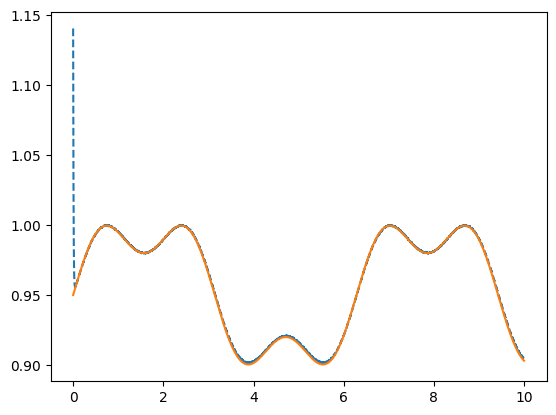

In [2]:
import matplotlib.pyplot as plt

plt.plot(t[:-1],y[0,0,:-1],'--')
plt.plot(t[:-1],r[0,0,:-1])

plt.show()

[1144.01250485 1073.06318377 1010.99213969 ...    9.52842523   10.03824812
   10.25310171]
[1.14066875 1.12891849 1.11862585 ... 0.90467488 0.90474343 0.90476289]
[1304.93931482 1211.40087425 1130.92194289 ...    8.62012691    9.08203901
    9.27662595]


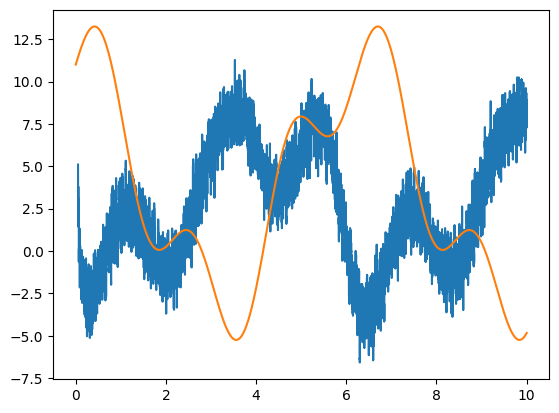

In [13]:
import matplotlib.pyplot as plt

#plt.plot(t[:-1],u[0,0,:-1])
print(u[0,0,:-1])
print(y[0,0,:-1])
print(np.multiply(u[0,0,:-1],y[0,0,:-1]))
plt.plot(t[100:-1],np.multiply(u[0,0,100:-1],y[0,0,100:-1]))
yy = 4. + 7.*np.cos(t)+3.*np.sin(3*t)

plt.plot(t,yy)
plt.show()

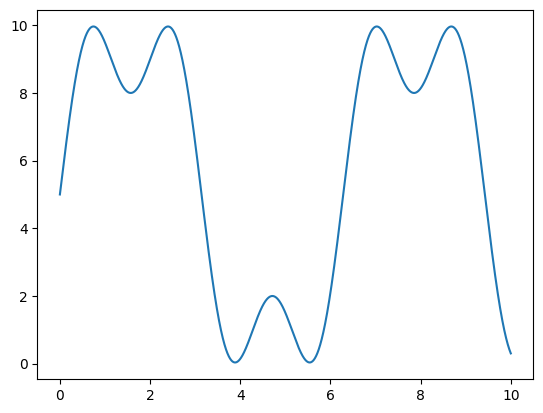

In [6]:
yy = 5. + 5.*np.sin(t)+2.*np.sin(3*t)
import matplotlib.pyplot as plt

plt.plot(t,yy)
plt.show()

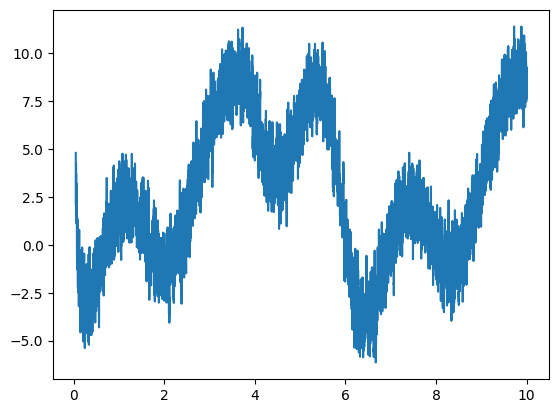

In [23]:
import matplotlib.pyplot as plt

plt.plot(t[100:-1],(u[0,0,100:-1]))

plt.show()



In [66]:
from platypus import NSGAII, NSGAIII, DTLZ2, Hypervolume, experiment, calculate, display
from platypus import *
from timeit import default_timer as timer

#kd = 10.
#kp = 6000.
#ki = 10.
#b = 5.
#m1 = 10.
#m2 = 20.
#delta = 10.
#param = [kp,kd,ki,b,m1,m2,delta]


#Param = [[alpha1,beta1,p1,q1,delta,mioo,p2,q2,gamma,k,p0,q0]]
def myobjective(x):
    #print(x)
    x = np.array(x)
    x = x.reshape(1,-1)
    M = np.shape(x)[0]

    output = np.zeros([M,5])

    for i in range(M):
        print(x[i])

        x1, t1,BATCH_t,BATCH_u,BATCH_S1,BATCH_S2 = main(x[i])
        output[i,0] = np.sum(np.absolute(np.diff(BATCH_u))) 
        output[i,1] = np.sum(np.absolute(BATCH_S1))
        output[i,2] = np.sum(np.absolute(BATCH_S2))
        output[i,3] = np.sum(np.absolute(np.dot(BATCH_t,np.dot(BATCH_S1,BATCH_S1))))
        output[i,4] = np.sum(np.absolute((BATCH_u)))
    return output[0]

problem = Problem(7, 5)
#problem.types[:] = Real(-10, 10)
#xlimits = np.array([[0.1,100],[0.1,10],[5,6],[4,5],[0.1,100],[0.1,10],[5,6],[4,5]])
#problem.types[:] = [Real(0.1,100), Real(0.1,10),Real(5,6), Real(4,5),Real(0.1,100), Real(0.1,10),Real(5,6), Real(4,5)]
problem.types[:] = [ Real(2000,10000),Real(10.,100),Real(10,100), Real(1,10),Real(1,100), Real(1,100), Real(1,10)]
problem.function = myobjective
#algorithmPSO = SMPSO(problem)
algorithmNSGAII = NSGAII(problem)
algorithmNSGAIII = NSGAIII(problem,divisions_outer=12)
#algorithmOMOPSO = OMOPSO(problem,epsilons=0.05)

start = timer()
algorithmNSGAII.run(250)
print("NSGAII",timer()-start) 



[6.00490022e+03 7.37767470e+01 5.64156336e+01 7.03954648e+00
 5.68457206e+01 1.98439227e+01 2.58527546e+00]


<ipython-input-55-670f3f16a01c>:135: RuntimeWarning: overflow encountered in matmul
  u_eqdot = -(Grad_h.T@gx/((Grad_h.T@gx)**2 + 0.0001))*(kp*(Grad_h.T@(fx + gx*u_eq[0,0,i])-rdot[0,0,i])+ki*(np.sign(e[0,0,i])*np.power(np.absolute(e[0,0,i]),q/p))+kd*((fx + gx*u_eq[0,0,i]).T@Grad2_h@(fx + gx*u_eq[0,0,i]) + Grad_h.T@(Grad_fx.T@xdot + Grad_gx.T@xdot*u_eq[0,0,i])-rddot[0,0,i])-b*sdot)
<ipython-input-55-670f3f16a01c>:135: RuntimeWarning: invalid value encountered in multiply
  u_eqdot = -(Grad_h.T@gx/((Grad_h.T@gx)**2 + 0.0001))*(kp*(Grad_h.T@(fx + gx*u_eq[0,0,i])-rdot[0,0,i])+ki*(np.sign(e[0,0,i])*np.power(np.absolute(e[0,0,i]),q/p))+kd*((fx + gx*u_eq[0,0,i]).T@Grad2_h@(fx + gx*u_eq[0,0,i]) + Grad_h.T@(Grad_fx.T@xdot + Grad_gx.T@xdot*u_eq[0,0,i])-rddot[0,0,i])-b*sdot)
<ipython-input-55-670f3f16a01c>:135: RuntimeWarning: invalid value encountered in matmul
  u_eqdot = -(Grad_h.T@gx/((Grad_h.T@gx)**2 + 0.0001))*(kp*(Grad_h.T@(fx + gx*u_eq[0,0,i])-rdot[0,0,i])+ki*(np.sign(e[0,0,i])*np.power(n

[8.37921983e+03 3.65689054e+01 7.13306542e+01 7.22931965e+00
 4.90033158e+00 5.01855676e+01 9.01536434e+00]
[5198.15833802   21.23412674   22.38468385    6.93973512   87.88258333
   54.94366135    9.04854886]
[6.60160480e+03 7.72844628e+01 8.65745469e+01 9.30760328e+00
 5.37533322e+01 3.52876273e+01 6.32829134e+00]
[2486.96007773   95.12400959   21.65679266    7.04250928   35.96668562
   57.67764503    9.95799442]
[7.62850643e+03 7.59674340e+01 3.03858022e+01 9.58033551e+00
 4.00564839e+01 8.33496996e+01 3.68057389e+00]
[2649.75706049   44.95739314   26.36405159    6.12926914   41.27160389
   85.29356909    9.71342683]
[9.17826832e+03 1.43382227e+01 9.09885532e+01 8.47972956e+00
 6.14842151e+01 2.97147699e+01 5.94367665e+00]
[4458.30652552   29.90397335   14.18979461    9.82512839   47.954682
   57.19841762    6.4819    ]
[4790.61352698   26.35927186   84.70186759    5.98293742   77.82156008
   37.50889942    6.02314748]
[9.82424689e+03 9.48947010e+01 2.46115794e+01 4.05281639e+00
 4.5

<ipython-input-55-670f3f16a01c>:135: RuntimeWarning: overflow encountered in multiply
  u_eqdot = -(Grad_h.T@gx/((Grad_h.T@gx)**2 + 0.0001))*(kp*(Grad_h.T@(fx + gx*u_eq[0,0,i])-rdot[0,0,i])+ki*(np.sign(e[0,0,i])*np.power(np.absolute(e[0,0,i]),q/p))+kd*((fx + gx*u_eq[0,0,i]).T@Grad2_h@(fx + gx*u_eq[0,0,i]) + Grad_h.T@(Grad_fx.T@xdot + Grad_gx.T@xdot*u_eq[0,0,i])-rddot[0,0,i])-b*sdot)


[4.77653390e+03 5.29712984e+01 4.54648378e+01 5.52093339e+00
 9.03914233e+01 6.92808350e+01 3.94732258e+00]
[9.74058181e+03 8.39353778e+01 9.03721595e+01 8.05709062e+00
 5.16017138e+00 2.35268458e+01 8.31491673e+00]
[4.80466374e+03 4.20502257e+01 7.85722044e+01 8.86572203e+00
 4.20570100e+01 2.62438798e+01 3.63280823e+00]
[7.56701977e+03 6.30737522e+01 9.04453523e+01 9.20758323e+00
 8.17764417e+01 2.14821920e+01 5.14144812e+00]
[7.27770600e+03 8.10544563e+01 3.83309662e+01 3.78714621e+00
 3.36047346e+01 9.83058175e+00 1.88014633e+00]
[8.51499330e+03 3.30083113e+01 3.31486471e+01 7.48108556e+00
 8.96991636e+01 4.26235374e+00 3.54421422e+00]
[3430.96735827   88.87962122   63.31136358    4.57013526   46.1412041
   95.94637337    6.76488452]
[7.77874371e+03 6.49527590e+01 4.47834657e+01 5.35589608e+00
 6.89953553e+00 3.71425268e+01 3.74415243e+00]
[9.23947003e+03 3.78969004e+01 1.92258530e+01 6.47712519e+00
 3.35806727e+00 3.24957955e+01 1.01779592e+00]
[2494.15968556   43.3737793    96.95

[4.17671738e+03 9.50304626e+01 3.29298432e+01 3.44908107e+00
 9.23974950e+01 1.65664973e+01 4.08253988e+00]
[9.23947003e+03 3.78969004e+01 8.11741787e+01 9.34086838e+00
 6.37643119e+00 3.44426921e+01 6.50064380e+00]
[6.60160480e+03 7.72844628e+01 1.98359459e+01 6.52814294e+00
 5.92177590e+01 3.26014179e+01 1.03521583e+00]
[3080.88680453   67.71680471   44.41888456    6.30161712   70.08840695
   42.6468805     8.64140374]
[4790.61352698   26.35927186   84.70186759    5.98293742   77.82156008
   44.93019449    6.02314748]
[6544.8192583    24.62340538   56.98692976    7.3796676    89.7775605
   73.58733132    9.13583732]
[2373.68550123   71.37594964   64.73735685    2.57928239   67.98765484
   33.97777242    3.74588274]
[4423.44493714   89.08119832   51.71298607    4.98296184   56.01374571
   53.28800837    7.30188467]
[4781.48664598   53.07192244   40.28684627    9.87125882   32.66400529
   84.9418022     9.88306123]
[8.51499330e+03 8.12871863e+01 3.57877892e+01 7.28726638e+00
 8.9699163

<ipython-input-55-670f3f16a01c>:140: RuntimeWarning: overflow encountered in multiply
  u_Sdot = -(Grad_h.T@gx/((Grad_h.T@gx)**2 + 0.0001))*(kp*(Grad_h.T@(gx*u_S[0,0,i]))+kd*((gx*u_S[0,0,i]).T@Grad2_h@(gx*u_S[0,0,i])+Grad_h.T@((Grad_gx.T@xdot)*u_S[0,0,i]))+m1*np.absolute(sdot)*np.sign(sdot)+m2*(np.absolute(sdot)**alpha)*np.sign(sdot)+delta*np.sign(sdot))


[7.85633045e+03 4.43453858e+01 9.69555690e+01 6.19526416e+00
 3.34362470e+01 8.78979113e+01 8.07390559e+00]
[2298.44978965   74.80328668   30.3858022     9.58033551   40.15363901
   33.64679585    3.68057389]
[3430.96735827   92.04636487   63.31136358    6.61071633   46.1412041
   95.94637337    6.77988745]
[8.35221719e+03 2.03416858e+01 5.81294101e+01 4.57122424e+00
 3.23203741e+00 4.77751659e+01 7.71598742e+00]
[8.24325266e+03 6.49926114e+01 3.07545012e+01 9.12545148e+00
 3.19167118e+00 6.31926637e+01 2.80787082e+00]
[9.61797292e+03 3.78969004e+01 1.92258530e+01 6.47712519e+00
 1.10108716e+00 3.24957955e+01 1.01779592e+00]
[8.99527021e+03 9.51240096e+01 2.16567927e+01 7.04250928e+00
 3.59666856e+01 5.76776450e+01 9.95799442e+00]
[3125.79888865   70.82578772   97.0395732     4.91050646   52.17515181
   11.69873909    5.46890473]
[6004.90022064   73.76372823   79.07468901    7.03954648   58.96012198
   19.4150011     6.55482379]
[3.43096736e+03 8.88926398e+01 5.65354452e+01 4.57013526e

<ipython-input-55-670f3f16a01c>:135: RuntimeWarning: invalid value encountered in add
  u_eqdot = -(Grad_h.T@gx/((Grad_h.T@gx)**2 + 0.0001))*(kp*(Grad_h.T@(fx + gx*u_eq[0,0,i])-rdot[0,0,i])+ki*(np.sign(e[0,0,i])*np.power(np.absolute(e[0,0,i]),q/p))+kd*((fx + gx*u_eq[0,0,i]).T@Grad2_h@(fx + gx*u_eq[0,0,i]) + Grad_h.T@(Grad_fx.T@xdot + Grad_gx.T@xdot*u_eq[0,0,i])-rddot[0,0,i])-b*sdot)


[4458.30652552   29.90397335   14.18979461    9.82512839   48.00196922
   58.93414382    6.4819    ]
[8.37921983e+03 3.71281321e+01 7.13306542e+01 7.22931965e+00
 5.78822721e+00 5.01855676e+01 9.01536434e+00]
[4.49691200e+03 5.94255260e+01 1.60111796e+01 8.25371330e+00
 2.98916295e+01 4.36319896e+01 1.54986460e+00]
[3028.96749636   67.71680471   56.60830766    6.30161712   70.08840695
   42.6468805     8.29630257]
[6.54481926e+03 2.22091423e+01 4.47975067e+01 8.03510873e+00
 6.80501069e+01 8.10701501e+01 3.13353965e+00]
[5.21017557e+03 5.08296348e+01 8.35738032e+01 7.17127927e+00
 4.36573395e+01 7.91403253e+01 4.73222685e+00]
[2649.75706049   44.95739314   27.38691192    6.12926914   41.27160389
   85.29356909    9.71342683]
[7.56701977e+03 7.97685304e+01 7.88917242e+01 9.20758323e+00
 8.17764417e+01 2.14821920e+01 5.35252724e+00]
[5.20570737e+03 6.40631450e+01 6.02787677e+01 7.87581396e+00
 7.70166767e+01 3.19511240e+00 1.18688120e+00]
[8.51499330e+03 3.23431603e+01 3.31486471e+01 7.4

[2.01576796e+03 3.43432377e+01 3.95209673e+01 1.54183545e+00
 5.42973333e+01 1.10234850e+00 1.06631422e+00]
[7.62850643e+03 7.59674340e+01 3.03858022e+01 9.58033551e+00
 4.02317503e+01 7.56032498e+01 3.68057389e+00]
[2426.45046329   11.55406464   19.51400776    8.21318503   84.16925913
   16.87015607    8.1610123 ]
[2389.57869945   35.16418771   25.66469141    9.59923874   23.45060569
   71.02576761    9.64981347]
[3431.06229237   84.73583021   63.31136358    4.57013526   46.1412041
   95.94637337    6.76488452]
[7.55733226e+03 7.59229631e+01 3.27777325e+01 9.61466200e+00
 7.32268456e+01 7.53443107e+01 7.33910170e+00]
[4.69530250e+03 3.85422014e+01 5.78034680e+01 7.87581396e+00
 2.93566804e+01 1.39394875e+00 1.16219884e+00]
[4781.48664598   53.07192244   40.28684627    9.87125882   32.66400529
   84.9418022     9.88306123]
[4458.30652552   29.90397335   14.18979461    9.82512839   38.51859166
   59.08326099    6.4819    ]
[7.62850643e+03 7.53359429e+01 8.14989136e+01 9.74243164e+00
 8.

In [67]:


f0NSGAII = [s.objectives[0] for s in algorithmNSGAII.result]
f1NSGAII = [s.objectives[1] for s in algorithmNSGAII.result]
f2NSGAII = [s.objectives[2] for s in algorithmNSGAII.result]
#f3NSGAII = [s.objectives[3] for s in algorithmNSGAII.result]
#f4NSGAII = [s.objectives[4] for s in algorithmNSGAII.result]

def normalize(x):
    return (x - np.min(x))/(np.max(x) - np.min(x))

argNSGAII=np.argmin(normalize(f0NSGAII) + normalize(f1NSGAII)  + normalize(f2NSGAII)) #+ normalize(f3NSGAII) +normalize(f4NSGAII))

print("variables NSGAII: ",np.array(algorithmNSGAII.result[argNSGAII].variables))

print("Obj NSGAII: ",np.array(algorithmNSGAII.result[argNSGAII].objectives))

paramNSGAII = (np.array(algorithmNSGAII.result[argNSGAII].variables))


variables NSGAII:  [2.01576796e+03 3.43432377e+01 3.95209673e+01 1.54183545e+00
 5.42973333e+01 1.10234850e+00 1.06631422e+00]
Obj NSGAII:  [           nan 4.41407283e+03 1.05302335e+04 1.67571550e+08
            nan]


In [78]:
print(paramNSGAII)
print(param)

[2.01576796e+03 3.43432377e+01 3.95209673e+01 1.54183545e+00
 5.42973333e+01 1.10234850e+00 1.06631422e+00]
[2.01576796e+03 3.43432377e+01 3.95209673e+01 1.54183545e+00
 5.42973333e+01 1.10234850e+00 1.06631422e+00]


In [75]:
param = [2123.1773545 ,   27.45548962 ,  50.05186371 ,   8.88710901 ,  23.6431032, 55.54476483,    7.63199221]

param = paramNSGAII
x1, t1,BATCH_t,BATCH_u,BATCH_S1,BATCH_S2 = main(param)

<ipython-input-55-670f3f16a01c>:135: RuntimeWarning: overflow encountered in matmul
  u_eqdot = -(Grad_h.T@gx/((Grad_h.T@gx)**2 + 0.0001))*(kp*(Grad_h.T@(fx + gx*u_eq[0,0,i])-rdot[0,0,i])+ki*(np.sign(e[0,0,i])*np.power(np.absolute(e[0,0,i]),q/p))+kd*((fx + gx*u_eq[0,0,i]).T@Grad2_h@(fx + gx*u_eq[0,0,i]) + Grad_h.T@(Grad_fx.T@xdot + Grad_gx.T@xdot*u_eq[0,0,i])-rddot[0,0,i])-b*sdot)
<ipython-input-55-670f3f16a01c>:140: RuntimeWarning: overflow encountered in matmul
  u_Sdot = -(Grad_h.T@gx/((Grad_h.T@gx)**2 + 0.0001))*(kp*(Grad_h.T@(gx*u_S[0,0,i]))+kd*((gx*u_S[0,0,i]).T@Grad2_h@(gx*u_S[0,0,i])+Grad_h.T@((Grad_gx.T@xdot)*u_S[0,0,i]))+m1*np.absolute(sdot)*np.sign(sdot)+m2*(np.absolute(sdot)**alpha)*np.sign(sdot)+delta*np.sign(sdot))
<ipython-input-55-670f3f16a01c>:135: RuntimeWarning: invalid value encountered in multiply
  u_eqdot = -(Grad_h.T@gx/((Grad_h.T@gx)**2 + 0.0001))*(kp*(Grad_h.T@(fx + gx*u_eq[0,0,i])-rdot[0,0,i])+ki*(np.sign(e[0,0,i])*np.power(np.absolute(e[0,0,i]),q/p))+kd*((fx

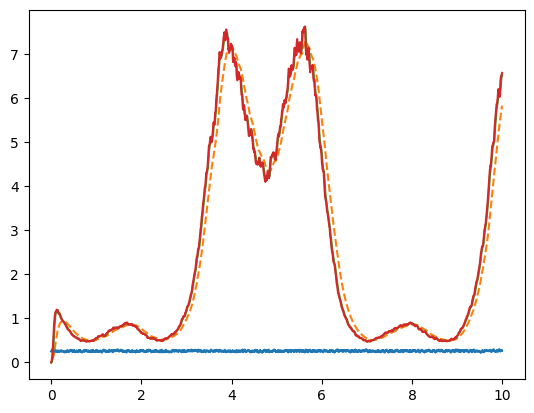

In [76]:
import matplotlib.pyplot as plt

#plt.plot(t[:-1],x1[0,0,:-1],'--')
plt.plot(t[:-1],x1[1,0,:-1])
plt.plot(t[:-1],x1[2,0,:-1],'--')
plt.plot(t[:-1],x1[3,0,:-1])
plt.plot(t[:-1],x1[4,0,:-1])



plt.show()

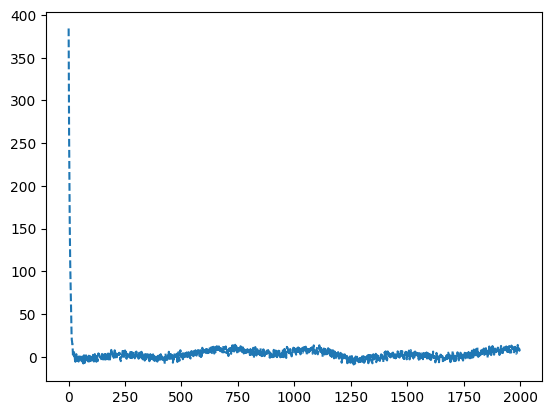

In [77]:
import matplotlib.pyplot as plt

plt.plot(BATCH_u,'--')

plt.show()

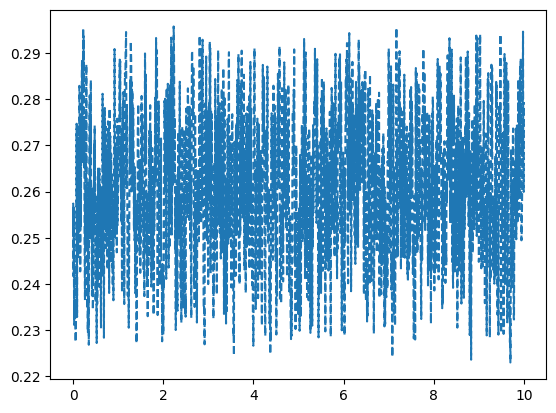

In [73]:
import matplotlib.pyplot as plt

plt.plot(t[:-1],x1[1,0,:-1],'--')

plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.plot(t[:-1],y[0,0,:-1],'--')
plt.plot(t[:-1],r[0,0,:-1])

plt.show()